In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve
from super_cub import *

In [2]:
alphas = np.linspace(-6.27, 15, 100)
del_e = np.linspace(-10, 10, 5)
Re_c = 500000
airplane = super_cub()
h = 0.4
Cms = np.zeros((len(del_e), len(alphas)))
Cls = np.zeros((len(del_e), len(alphas)))
Cds = np.zeros((len(del_e), len(alphas)))

for i in range(len(del_e)):
    for j in range(len(alphas)):
        Cms[i,j] = airplane.get_coefficients(alphas[j], del_e[i], Re_c, h)[0]
        Cls[i,j] = airplane.get_coefficients(alphas[j], del_e[i], Re_c, h)[1]
        Cds[i,j] = airplane.get_coefficients(alphas[j], del_e[i], Re_c, h)[2]
    


# Define the del_e values
del_e_values = np.linspace(-10, 10, 5)
alpha_trim = np.linspace(-18,18, 100)
trim_cl = []
trim_cd = []

for alpha in alpha_trim:
    f_CM = lambda x: airplane.get_coefficients(5, x, Re_c, h)[0]
    del_e = fsolve(f_CM, 0)[0]
    trim_cl.append(airplane.get_coefficients(alpha, del_e, Re_c, h)[1])
    trim_cd.append(airplane.get_coefficients(alpha, del_e, Re_c, h)[2])

from scipy.optimize import curve_fit

def parabolic_function(x, cd0, K):
    return cd0 + K*x**2

popt, _ = curve_fit(parabolic_function, trim_cl, trim_cd)
coefficients = np.polyfit(trim_cl, trim_cd, 2)

# Extract the coefficients
cd0 = popt[0]
K = popt[1]

# Generate the fitted curve
fit_curve = np.polyval(coefficients, trim_cl)


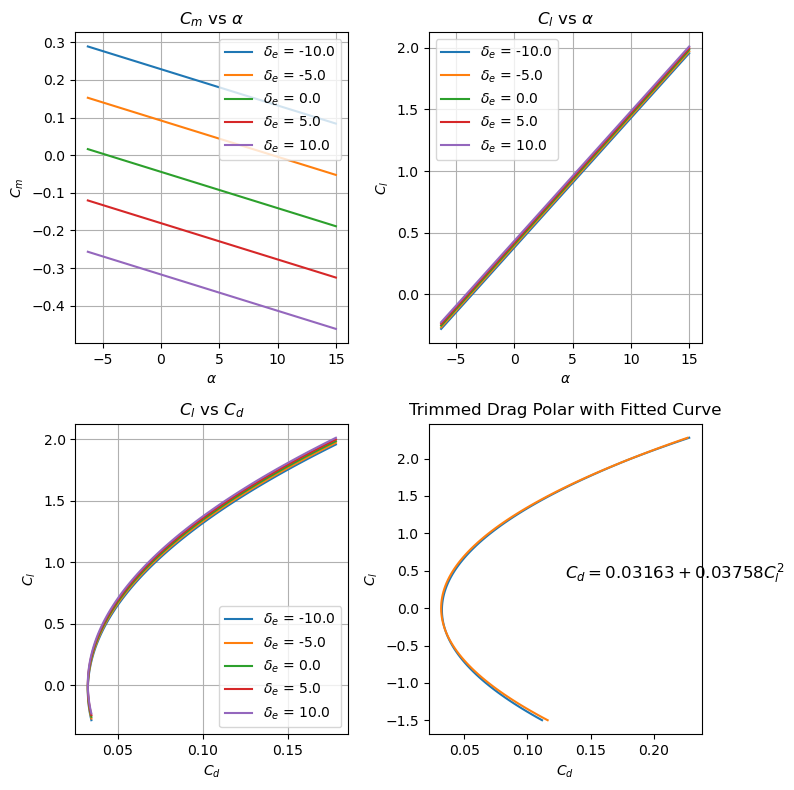

In [4]:
"""
Sliders for design hyperparameters:
    - b_w: wing span
    - c_w: wing chord
    - b_t: tail span
    - c_t: tail chord
    - c_ef: elevator chord factor (c_e/c_t)
    -i_h: horizontal tail incidence angle
    -d_f: fuselage diameter
    -l_f: fuselage length
    -h_tv: vertical tail height
    -l_tv: vertical tail length
"""
Sliders = ['b_w', 'c_w', 'b_t', 'c_t', 'c_ef', 'i_h', 'd_f', 'l_f', 'h_tv', 'l_tv']


Slider_lims = [()]
from matplotlib.widgets import Button, Slider
from matplotlib.widgets import Slider

import matplotlib.pyplot as plt
# Create the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Plot Cm vs alphas for each del_e value
for i, del_e in enumerate(del_e_values):
    axs[0,0].plot(alphas, Cms[i], label=f"$\delta_e$ = {del_e}")
    
# Set the plot title and labels
axs[0,0].set_title("$C_m$ vs $\\alpha$")
axs[0,0].set_xlabel("$\\alpha$")
axs[0,0].set_ylabel("$C_m$")

# Add a legend
axs[0,0].legend()
axs[0,0].grid(True)

# Plot Cl vs alphas for each del_e value
for i, del_e in enumerate(del_e_values):
    axs[0,1].plot(alphas, Cls[i], label=f"$\delta_e$ = {del_e}")
    
# Set the plot title and labels
axs[0,1].set_title("$C_l$ vs $\\alpha$")
axs[0,1].set_xlabel("$\\alpha$")
axs[0,1].set_ylabel("$C_l$")

# Add a legend
axs[0,1].legend()
axs[0,1].grid(True)

# Plot Cl vs Cd for each del_e value
for i, del_e in enumerate(del_e_values):
    axs[1,0].plot(Cds[i], Cls[i], label=f"$\delta_e$ = {del_e}")
    
# Set the plot title and labels
axs[1,0].set_title("$C_l$ vs $C_d$")
axs[1,0].set_xlabel("$C_d$")
axs[1,0].set_ylabel("$C_l$")

# Add a legend
axs[1,0].legend()
axs[1,0].grid(True)

axs[1,1].plot(trim_cd, trim_cl, label='Data')
axs[1,1].plot(cd0+K*np.array(trim_cl)**2, trim_cl, label='Fitted Curve')

# Annotate the fit equations
equation = f"$C_d = {cd0:.5f} + {K:.5f}C_l^2$"
axs[1,1].annotate(equation, xy=(0.5, 0.5), xycoords='axes fraction', fontsize=12)

# Set the plot title and labels
axs[1,1].set_title("Trimmed Drag Polar with Fitted Curve")
axs[1,1].set_xlabel("$C_d$")
axs[1,1].set_ylabel("$C_l$")

# Adjust the spacing between subplots
# plt.tight_layout()

# Show the plot
plt.savefig('subplot_plots.jpg', dpi=300)



# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [5]:
trim_cd = cd0+K*np.array(trim_cl)**2
np.max(trim_cl/trim_cd)

14.502201953189111

In [7]:
cl_cruise = trim_cl[np.argmax(trim_cl/trim_cd)]

In [8]:
S = (2*17.955*9.81)/(1.225*44.70**2*0.912)
S

0.15781142419582123

In [9]:
airplane.a3dw

0.09961369367087326

In [ ]:
v = np.linspace(6, 14, 100)
rho = 1.22
thrust = cd0*rho*v**2*airplane.Sw/2 + 2*K*(0.75*9.81)**2/(rho*v**2*airplane.Sw)
power = cd0*rho*v**3*airplane.Sw/2 + 2*K*(0.75*9.81)**2/(rho*v*airplane.Sw)

gram_thrust = thrust/(9.81)*1000



In [ ]:
# Find the index of the minimum gram thrust value
fig, ax1 = plt.subplots()
min_index = np.argmin(gram_thrust)

# Annotate the minimum gram thrust value
ax1.annotate(f"Velocity for min thrust: {v[min_index]:.2f} m/s", 
             xy=(v[min_index], gram_thrust[min_index]), 
             xytext=(v[min_index]-2, gram_thrust[min_index]+25), 
             arrowprops=dict(facecolor='black', arrowstyle='->'))


# Plot gram thrust
ax1.plot(v, gram_thrust, 'b-', label='Gram Thrust')
ax1.set_xlabel('Velocity (m/s)')
ax1.set_ylabel('Thrust (grams)', color='b')
ax1.tick_params('y', colors='b')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot power
ax2.plot(v, power, 'r-', label='Power')
ax2.set_ylabel('Power', color='r')
ax2.tick_params('y', colors='r')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Set the plot title
plt.title('Thrust and Power vs Velocity')

# Show the plot
plt.grid(True)
plt.savefig('Thrust_and_Power_vs_Velocity.jpg', dpi=300)
plt.show()


In [ ]:
thrust1 = cd0*rho*v**2*airplane.Sw/2
thrust2 = 2*K*(0.75*9.81)**2/(rho*v**2*airplane.Sw)

import matplotlib.pyplot as plt

fig = plt.figure()
# Plot thrust1 and thrust2 against v
plt.plot(v, thrust1, label='Thrust 1')
plt.plot(v, thrust2, label='Thrust 2')
plt.plot(v, thrust, label='Thrust')

# Set the plot title and labels
plt.title('Thrust 1 and Thrust 2 vs Velocity')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Thrust')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [ ]:
# Create the figure and the line that we will manipulate
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
line, = axs[0].plot(t, f(t, init_amplitude, init_frequency), lw=2)
axs[0].set_xlabel('Time [s]')

# Make a horizontally oriented slider to control the frequency.
axfreq = fig.add_axes([0.1, 0.1, 0.65, 0.03])
freq_slider = Slider(
    ax=axfreq,
    label='Frequency [Hz]',
    valmin=0.1,
    valmax=30,
    valinit=init_frequency,
)

# Make a vertically oriented slider to control the amplitude
axamp = fig.add_axes([0.85, 0.25, 0.03, 0.5])
amp_slider = Slider(
    ax=axamp,
    label="Amplitude",
    valmin=0,
    valmax=10,
    valinit=init_amplitude,
    orientation="vertical"
)

# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(f(t, amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()

# Register the update function with each slider
freq_slider.on_changed(update)
amp_slider.on_changed(update)

plt.show()